In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train_df = pd.read_csv(r"E:\DS\pandas\Titanic\Excel Files\train.csv")

- <h3> Looking Into DataFrame 

In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_df.shape

(891, 12)

In [7]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Surviaval Count

In [8]:
train_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

C:\Users\ARK\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


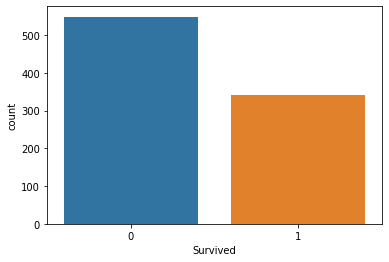

In [9]:
sns.countplot('Survived',data=train_df)
plt.show()

- <h3> Droping Columns And Filling Na Values

- - ## Before

In [10]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Droping Columns

In [11]:
train_df.drop(columns=['Name','Ticket','Cabin'],inplace=True)

### Filling Na Values

In [ ]:
train_df['Age'].fillna(train_df['Age'].mean(),inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0],inplace=True)

- - ## After

In [132]:
train_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

- ### Converting Continuous Values To Categorical Values

In [17]:
# Male : 0
# Female : 0
train_df['Sex'] = train_df['Sex'].map({"male":0,"female":1})

In [18]:
# S : 0
# C : 1
# Q : 2
train_df['Embarked'] = train_df['Embarked'].map({"S":0,"C":1,"Q":2})

- # Reading Test And Gender Submission Csv & Performing EDA

In [116]:
test_df = pd.read_csv(r"E:\DS\pandas\Titanic\Excel Files\test.csv")
gender_df = pd.read_csv(r"E:\DS\pandas\Titanic\Excel Files\gender_submission.csv")
test_df = test_df.merge(gender_df, left_on='PassengerId', right_on='PassengerId')
test_model1 = test_df[['PassengerId','Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked','Survived']]
test_model2 = test_model1
test_model2 = test_model1.dropna()

test_model1['Age'].fillna(test_model1['Age'].mean(),inplace=True)
test_model1['Fare'].fillna(test_model1['Fare'].mean(),inplace=True)
test_model1['Sex'] = test_model1['Sex'].map({"male":0,"female":1})
test_model1['Embarked'] = test_model1['Embarked'].map({"S":0,"C":1,"Q":2})

test_model2['Sex'] = test_model2['Sex'].map({"male":0,"female":1})
test_model2['Embarked'] = test_model2['Embarked'].map({"S":0,"C":1,"Q":2})

X1 = test_model1[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
Y1 = test_model1['Survived']
X2 = test_model2[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
Y2 = test_model2['Survived']

- # Model Training

- ### Logistic Regression

In [121]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
X_train = train_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y_train = train_df['Survived']
logistic_model.fit(X_train,y_train)

LogisticRegression()

In [122]:
model_test1 = logistic_model.score(X1,Y1)
model_test2 = logistic_model.score(X2,Y2)
print("model_test1: ",model_test1)
print("model_test2: ",model_test2)

model_test1:  0.9425837320574163
model_test2:  0.9395770392749244


                Storing Model

In [128]:
import pickle
with open("logistic_model_titanic_prediction.pickle","wb") as f:
    rmodel = pickle.dump(logistic_model,f)

- ###  Random Forest

In [134]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier(n_estimators=40)
X_train = train_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y_train = train_df['Survived']
rfc_model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=40)

In [135]:
model_test1 = rfc_model.score(X1,Y1)
model_test2 = rfc_model.score(X2,Y2)
print("model_test1: ",model_test1)
print("model_test2: ",model_test2)

model_test1:  0.8014354066985646
model_test2:  0.8126888217522659


            Storing Model

In [136]:
import pickle
with open("random_model_titanic_prediction.pickle","wb") as f:
    rmodel = pickle.dump(rfc_model,f)

In [137]:
import pickle
with open("random_model_titanic_prediction.pickle","rb") as f:
    rfc_model = pickle.load(f)
X_train_prediction = rfc_model.predict([[1,0,40.0,0,0,27.7208,1]])
print(X_train_prediction[0])

0


C:\Users\ARK\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import pickle
with open("logistic_model_titanic_prediction.pickle","rb") as f:
    logistic_model = pickle.load(f)
X_train_prediction = logistic_model.predict([[1,0,40.0,0,0,27.7208,1]])
print(X_train_prediction[0])